In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')


import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications import resnet50
from keras.models import Model, load_model
from keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import cv2



2024-04-13 20:22:24.107151: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 20:22:24.140220: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 20:22:24.140260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 20:22:24.141064: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-13 20:22:24.146011: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 20:22:24.147010: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
for dirname, _, filenames in os.walk('./data'):
    print(dirname)

./data
./data/cell_images
./data/cell_images/cell_images
./data/cell_images/cell_images/Parasitized
./data/cell_images/cell_images/Uninfected
./data/Parasitized
./data/Uninfected


In [3]:
def data_prep(parasitized, uninfected):
    
    parasitized = ["./data/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected = ["./data/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized) * ['parasitized'] + len(uninfected) * ['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})

In [4]:
df = data_prep(os.listdir("./data/Parasitized/"), os.listdir("./data/Uninfected/"))

In [5]:


print("Shape of the DataFrame:", df.shape)
print("\nHead of the DataFrame:")
print(df.head())
print("\nTail of the DataFrame:")
print(df.tail())



Shape of the DataFrame: (27558, 2)

Head of the DataFrame:
                                          Image_Path       Labels
0  ./data/Parasitized/C99P60ThinF_IMG_20150918_14...  parasitized
1  ./data/Parasitized/C99P60ThinF_IMG_20150918_14...  parasitized
2  ./data/Parasitized/C99P60ThinF_IMG_20150918_14...  parasitized
3  ./data/Parasitized/C99P60ThinF_IMG_20150918_14...  parasitized
4  ./data/Parasitized/C99P60ThinF_IMG_20150918_14...  parasitized

Tail of the DataFrame:
                                              Image_Path      Labels
27553  ./data/Uninfected/C99P60ThinF_IMG_20150918_141...  uninfected
27554  ./data/Uninfected/C99P60ThinF_IMG_20150918_141...  uninfected
27555  ./data/Uninfected/C99P60ThinF_IMG_20150918_141...  uninfected
27556  ./data/Uninfected/C99P60ThinF_IMG_20150918_141...  uninfected
27557  ./data/Uninfected/C99P60ThinF_IMG_20150918_141...  uninfected


In [6]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Function to load and preprocess images
def load_images(file_paths, target_size=(64, 64)):
    images = []
    for path in file_paths:
        img = cv2.imread(path)
        img = cv2.resize(img, target_size)
        images.append(img)
    return np.array(images)

# Load and preprocess images
X = load_images(df['Image_Path'])
y = df['Labels']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an improved CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = model.fit(X_train, (y_train == 'parasitized').astype(int), epochs=30, batch_size=32, validation_split=0.2)
print(history)


Epoch 1/30
552/552 [==============================] - 37s 65ms/step - loss: 0.5230 - accuracy: 0.7557 - val_loss: 0.2964 - val_accuracy: 0.9209
Epoch 2/30
552/552 [==============================] - 36s 66ms/step - loss: 0.2071 - accuracy: 0.9321 - val_loss: 0.2004 - val_accuracy: 0.9177
Epoch 3/30
552/552 [==============================] - 38s 69ms/step - loss: 0.1780 - accuracy: 0.9444 - val_loss: 0.1815 - val_accuracy: 0.9531
Epoch 4/30
552/552 [==============================] - 40s 73ms/step - loss: 0.1570 - accuracy: 0.9524 - val_loss: 0.1495 - val_accuracy: 0.9558
Epoch 5/30
552/552 [==============================] - 51s 93ms/step - loss: 0.1449 - accuracy: 0.9553 - val_loss: 0.1264 - val_accuracy: 0.9567
Epoch 6/30
552/552 [==============================] - 42s 76ms/step - loss: 0.1398 - accuracy: 0.9558 - val_loss: 0.1172 - val_accuracy: 0.9592
Epoch 7/30
552/552 [==============================] - 38s 69ms/step - loss: 0.1263 - accuracy: 0.9589 - val_loss: 0.1215 - val_accuracy:

In [7]:

results = {
    'Kernel Type': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Specificity': [],
}

# Extract features from the CNN model
cnn_features_train = model.predict(X_train)
cnn_features_test = model.predict(X_test)

# Reshape features for SVM
cnn_features_train_flat = cnn_features_train.reshape(
    cnn_features_train.shape[0], -1)
cnn_features_test_flat = cnn_features_test.reshape(
    cnn_features_test.shape[0], -1)

# List of kernel types
kernels = ['linear', 'poly', 'rbf']

# Train and evaluate SVM models for each kernel
for kernel_type in kernels:
    # Build an SVM model
    svm_model = SVC(kernel=kernel_type)
    svm_model.fit(cnn_features_train_flat, (y_train == 'parasitized'))

    # Predict using the SVM model
    svm_predictions = svm_model.predict(cnn_features_test_flat)
    y_pred = svm_model.predict(cnn_features_test_flat)

    # Evaluate the SVM model for each kernel
    accuracy = accuracy_score((y_test == 'parasitized'), svm_predictions)
    print(f"Accuracy of the SVM model (kernel: {kernel_type}): {accuracy*100}")
    accuracy = accuracy_score((y_test == 'parasitized'), y_pred)
    f1 = f1_score((y_test == 'parasitized'), y_pred)
    precision = precision_score((y_test == 'parasitized'), y_pred)
    conf_matrix = confusion_matrix((y_test == 'parasitized'), y_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    results['Kernel Type'].append(kernel_type)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Precision'].append(precision)
    results['Specificity'].append(specificity)



173/173 [==============================] - 3s 16ms/step
Accuracy of the SVM model (kernel: linear): 95.30116110304789
Accuracy of the SVM model (kernel: poly): 95.4100145137881
Accuracy of the SVM model (kernel: rbf): 95.44629898403484


In [10]:
for index, row in results.iterrows():
    print("Kernel Type:", row['Kernel Type'])
    print("Accuracy:", row['Accuracy'])
    print("F1 Score:", row['F1 Score'])
    print("Precision:", row['Precision'])
    print("Specificity:", row['Specificity'])
    print("\n")


Kernel Type: 0
Accuracy: 0.9530116110304789
F1 Score: 0.9531730247694811
Precision: 0.964155084125823
Specificity: 0.9639042357274401


Kernel Type: 1
Accuracy: 0.954100145137881
F1 Score: 0.9538068285557787
Precision: 0.9746268656716418
Specificity: 0.9749539594843463


Kernel Type: 2
Accuracy: 0.9544629898403484
F1 Score: 0.9547339945897205
Precision: 0.9632459970887919
Specificity: 0.9627992633517496




### Only considering RBF

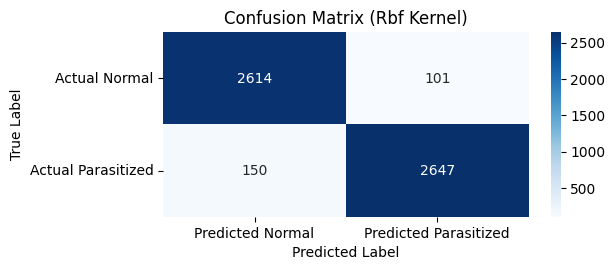

In [15]:
import seaborn as sns

# Set up subplot
plt.subplot(2, 1, 2)

# Specify the kernel type
kernel_type = 'rbf'

# Build an SVM model
svm_model = SVC(kernel=kernel_type)
svm_model.fit(cnn_features_train_flat, (y_train == 'parasitized'))

# Predict using the SVM model
y_pred = svm_model.predict(cnn_features_test_flat)

# Calculate confusion matrix
conf_matrix = confusion_matrix((y_test == 'parasitized'), y_pred)

# Plot heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Normal', 'Predicted Parasitized'],
            yticklabels=['Actual Normal', 'Actual Parasitized'])
plt.title(f'Confusion Matrix ({kernel_type.capitalize()} Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

plt.show()
